# Crop Classification and Residual Analysis

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
import warnings
warnings.filterwarnings('ignore')

In [2]:
Crops = pd.read_csv('Data/Agosto.csv').iloc[:,1:]

In [3]:
Crops['crop_list']
Active = Crops[Crops['is_active'] == 1]

In [4]:
lottacrop = Active[Active.crop_list.str.contains('OAT')|Active.crop_list.str.contains('SUNFLOWER')  | Active.crop_list.str.contains('ALMOND') | Active.crop_list.str.contains('GRAPE') | Active.crop_list.str.contains('WALNUT') |Active.crop_list.str.contains('RICE') | Active.crop_list.str.contains('ALFALFA')| Active.crop_list.str.contains('ALFALFA') | Active.crop_list.str.contains('CORN')| Active.crop_list.str.contains('WHEAT')| Active.crop_list.str.contains('TOMATO')  | Active.crop_list.str.contains('SAFFLOWER')]

In [6]:
lottacrop.crop_list[lottacrop['crop_list'].str.contains('ALMOND')] = 'ALMOND'
lottacrop.crop_list[lottacrop['crop_list'].str.contains('GRAPE')] = 'GRAPE'
lottacrop.crop_list[lottacrop['crop_list'].str.contains('OAT')] = 'OAT'
lottacrop.crop_list[lottacrop['crop_list'].str.contains('RICE')] = 'RICE'
lottacrop.crop_list[lottacrop['crop_list'].str.contains('SUNFLOWER')] = 'SUNFLOWER'
lottacrop.crop_list[lottacrop['crop_list'].str.contains('WALNUT')] = 'WALNUT'
lottacrop.crop_list[lottacrop['crop_list'].str.contains('ALFALFA')] = 'ALFALFA'
lottacrop.crop_list[lottacrop['crop_list'].str.contains('CORN')] = 'CORN'
lottacrop.crop_list[lottacrop['crop_list'].str.contains('WHEAT')] = 'WHEAT'
lottacrop.crop_list[lottacrop['crop_list'].str.contains('TOMATO')] = 'TOMATO'
lottacrop.crop_list[lottacrop['crop_list'].str.contains('SAFFLOWER')] = 'SAFFLOWER'

In [8]:
lottacrop['code'] = lottacrop.crop_list.astype('category').cat.codes

In [9]:
crops_list = {"WALNUT":9,"ALFALFA":0,"OAT":4,"GRAPE":3,"ALMOND":1,"WHEAT":10,"RICE":5,"CORN":2,"SAFFLOWER":6, "SUNFLOWER":7, "TOMATO":8}

# Model Selection Process with all Crops

In [10]:
firstx = lottacrop.iloc[:,1:61].dropna()
secondx = lottacrop.iloc[:,85:-1].dropna()

In [11]:
fullx = firstx.join(secondx).dropna()
fully = lottacrop.loc[fullx.index,'code']
fully.shape
X_train, X_test, Y_train, Y_test = train_test_split(fullx,fully,test_size = .4)

In [12]:
n_neighbors = 25

RFC = RandomForestClassifier()
extra = ExtraTreesClassifier()
knn = neighbors.KNeighborsClassifier(n_neighbors, weights='distance',algorithm='ball_tree')

knn.fit(X_train, Y_train)
extra.fit(X_train,Y_train)
RFC.fit(X_train,Y_train)
svm = OneVsOneClassifier(LinearSVC(random_state=0)).fit(X_train, Y_train)

In [13]:
print(svm.score(X_test,Y_test))
print(knn.score(X_test,Y_test))
print(extra.score(X_test,Y_test))
print(RFC.score(X_test,Y_test))

0.7290057915057915
0.8752413127413128
0.8856177606177607
0.8783783783783784


In [14]:
import scipy as sc
entropy=sc.stats.entropy(extra.predict_proba(X_test))
entropy

array([6.68339901, 6.391747  , 5.5044286 , 6.00857544, 5.41822544,
       5.79721472, 5.33612653, 6.51226221, 6.82383752, 5.8205671 ,
       6.50445535])

In [15]:
confusion_matrix(Y_test,extra.predict(X_test))

array([[612,   7,   0,   2,   3,   0,   3,   2,  10,   1,   9],
       [  8, 392,   0,  13,   7,   0,   0,   3,   1,  11,   6],
       [  1,   6, 128,   1,   1,   0,   5,   8,   2,   0,   1],
       [  7,  16,   1, 238,   0,   0,   1,   1,   3,   6,   5],
       [  6,   5,   0,   2, 104,   2,   4,   0,   0,   1,  11],
       [  0,   2,   3,   1,   1, 284,   1,   4,   3,   3,   0],
       [  3,   2,   5,   0,   0,   1, 109,   3,   5,   0,  18],
       [  6,   2,  11,   3,   4,   1,   6, 440,  15,   0,   4],
       [ 12,   2,   9,   3,   0,   1,   0,  45, 688,   0,   2],
       [  6,  19,   0,  12,   1,   1,   0,   1,   1, 173,   3],
       [ 13,  10,   1,   4,  13,   0,   3,   8,  13,   2, 502]],
      dtype=int64)

In [16]:
confusion_matrix(Y_test,RFC.predict(X_test))

array([[608,   9,   0,   2,   2,   0,   3,   4,   9,   1,  11],
       [  3, 408,   0,   6,   7,   1,   0,   3,   2,   3,   8],
       [  0,   6, 125,   0,   1,   0,   5,   8,   4,   2,   2],
       [ 11,  26,   0, 227,   0,   0,   0,   1,   1,   7,   5],
       [  4,   7,   0,   2,  99,   5,   1,   1,   0,   1,  15],
       [  0,   3,   0,   0,   0, 290,   1,   4,   2,   0,   2],
       [  5,   7,   3,   0,   0,   1, 107,   4,   6,   0,  13],
       [  6,   1,  11,   2,   1,   1,   8, 429,  27,   3,   3],
       [ 14,   3,   9,   1,   0,   1,   0,  48, 681,   0,   5],
       [  6,  25,   0,   7,   7,   2,   0,   4,   1, 165,   0],
       [  9,  20,   0,   3,   9,   0,   3,   8,  15,   1, 501]],
      dtype=int64)

# Using Non-Organic Data

In [34]:
nonorg = lottacrop.drop(lottacrop.crop_list[lottacrop.crop_list.str.contains('ORG')].index)

In [35]:
nonorg.crop_list[nonorg['crop_list'].str.contains('ALMOND')] = 'ALMOND'
nonorg.crop_list[nonorg['crop_list'].str.contains('GRAPE')] = 'GRAPE'
nonorg.crop_list[nonorg['crop_list'].str.contains('OAT')] = 'OAT'
nonorg.crop_list[nonorg['crop_list'].str.contains('RICE')] = 'RICE'
nonorg.crop_list[nonorg['crop_list'].str.contains('SUNFLOWER')] = 'SUNFLOWER'
nonorg.crop_list[nonorg['crop_list'].str.contains('WALNUT')] = 'WALNUT'
nonorg.crop_list[nonorg['crop_list'].str.contains('ALFALFA')] = 'ALFALFA'
nonorg.crop_list[nonorg['crop_list'].str.contains('CORN')] = 'CORN'
nonorg.crop_list[nonorg['crop_list'].str.contains('WHEAT')] = 'WHEAT'
nonorg.crop_list[nonorg['crop_list'].str.contains('TOMATO')] = 'TOMATO'
nonorg.crop_list[nonorg['crop_list'].str.contains('SAFFLOWER')] = 'SAFFLOWER'

In [36]:
nonorg['code'] = nonorg.crop_list.astype('category').cat.codes

In [37]:
firstx = nonorg.iloc[:,1:61].dropna()
secondx = nonorg.iloc[:,85:-1].dropna()

In [38]:
fullx = firstx.join(secondx).dropna()
fully = nonorg.loc[fullx.index,'code']
fully.shape
X_train, X_test, Y_train, Y_test = train_test_split(fullx,fully,test_size = .4)

In [39]:
n_neighbors = 25

RFC = RandomForestClassifier()
extra = ExtraTreesClassifier()
knn = neighbors.KNeighborsClassifier(n_neighbors, weights='distance',algorithm='ball_tree')

knn.fit(X_train, Y_train)
extra.fit(X_train,Y_train)
RFC.fit(X_train,Y_train)
svm = OneVsOneClassifier(LinearSVC(random_state=0)).fit(X_train, Y_train)

In [40]:
print(svm.score(X_test,Y_test))
print(knn.score(X_test,Y_test))
print(extra.score(X_test,Y_test))
print(RFC.score(X_test,Y_test))

0.6855694980694981
0.8687258687258688
0.888030888030888
0.8846525096525096


In [41]:
import scipy as sc
entropy=sc.stats.entropy(extra.predict_proba(X_test))
entropy

array([6.62881552, 6.45346779, 5.49003444, 5.96407906, 5.35421581,
       5.87155796, 5.43281629, 6.53570014, 6.8122123 , 5.84557946,
       6.45764755])

In [42]:
confusion_matrix(Y_test,extra.predict(X_test))

array([[582,   6,   0,   1,   1,   0,   1,   5,   7,   1,   8],
       [  5, 426,   0,  15,   4,   0,   0,   2,   1,   5,   9],
       [  0,   2, 143,   1,   3,   0,   1,   2,   9,   1,   4],
       [ 15,  19,   0, 206,   0,   0,   2,   0,   2,   8,   8],
       [  3,  15,   0,   0,  98,   2,   1,   0,   0,   1,  19],
       [  3,   1,   2,   0,   3, 313,   1,   2,   0,   0,   3],
       [  8,   1,   5,   4,   1,   5, 134,   4,   4,   0,   9],
       [  8,   5,   9,   0,   0,   4,   5, 453,  29,   0,   2],
       [ 15,   0,  10,   0,   0,   3,   0,  31, 658,   2,   7],
       [  0,  16,   0,  21,   2,   2,   0,   2,   1, 201,   1],
       [ 11,   5,   3,   2,   3,   0,   6,   5,   8,   1, 466]],
      dtype=int64)

In [43]:
confusion_matrix(Y_test,RFC.predict(X_test))

array([[582,   8,   0,   1,   4,   0,   1,   3,   7,   0,   6],
       [  4, 420,   3,  17,   5,   0,   0,   1,   2,   5,  10],
       [  3,   1, 135,   4,   1,   0,   2,   3,  12,   0,   5],
       [ 13,  23,   0, 210,   0,   0,   2,   0,   1,   5,   6],
       [  3,  10,   0,   0,  94,   3,   1,   0,   0,   1,  27],
       [  1,   1,   1,   0,   0, 310,   1,   6,   1,   0,   7],
       [  5,   1,   5,   3,   2,   1, 136,   6,   5,   0,  11],
       [  3,   1,   4,   0,   5,   1,   3, 447,  49,   0,   2],
       [ 11,   2,  10,   1,   4,   3,   0,  29, 664,   0,   2],
       [  5,  22,   0,  12,   2,   2,   0,   2,   1, 200,   0],
       [ 12,   4,   4,   2,   2,   1,   4,   5,   8,   0, 468]],
      dtype=int64)

## Residual Analysis
#### Entropy Analysis for Extra Trees Classifier

In [17]:
misclassified = np.where(Y_test != extra.predict(X_test))
classified = np.where(Y_test == extra.predict(X_test))

In [18]:
def logfcn(x):
    c = x.copy()
    c[np.where(c == 0.0)] = 1 
    return np.log(c)

In [19]:
pk = extra.predict_proba(X_test)
d = pk * logfcn(pk)
entropy = -1*np.sum(d, axis = 1)

In [20]:
import geopandas as gpd

In [21]:
cropfields = gpd.read_file("Crops_2016/Crops_2016_26910.shp")
cropfields1 = cropfields[["OBJECTID", "geometry"]]

In [22]:
tests = lottacrop.loc[X_test.index]
tests['entropy'] = entropy
testfields = gpd.GeoDataFrame(tests.merge(cropfields1, on = 'OBJECTID', how = 'left'))

In [23]:
testfields["geometry"] = testfields["geometry_y"]
testfields = testfields.drop(columns = ["geometry_y"])
testfields.crs = {'init': 'epsg:26910'}
testfields = testfields.to_crs("+proj=longlat +datum=WGS84 +no_defs ")

In [24]:
counties = gpd.read_file("cb_2016_us_county_500k/cb_2016_us_county_500k.shp")
cali = counties[counties.STATEFP == "06"]
keep = ["Yolo", "Lake", "Colusa", "Sutter", "Sacramento", "Solano", "Napa"]
yolo = cali[cali.NAME.isin(keep)]

Text(44.3617,0.5,'Longitude')

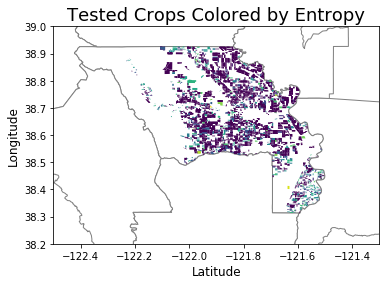

In [25]:
ax = yolo.plot(color = "white", edgecolor = "gray")
testfields.plot(ax =ax, column = 'entropy')
ax.set_xlim([-122.5, -121.3])
ax.set_ylim([38.2, 39])
ax.set_title("Tested Crops Colored by Entropy", fontsize = 18)
ax.set_xlabel("Latitude", fontsize = 12)
ax.set_ylabel("Longitude", fontsize = 12)

In [26]:
misclass_test = testfields.loc[misclassified]

Text(44.3617,0.5,'Longitude')

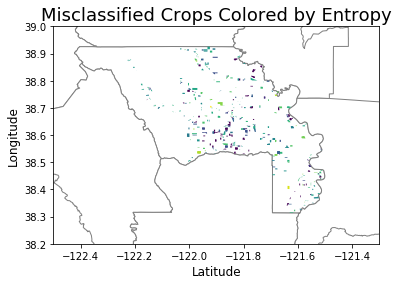

In [27]:
ax = yolo.plot(color = "white", edgecolor = "gray")
misclass_test.plot(ax =ax, column = 'entropy')
ax.set_xlim([-122.5, -121.3])
ax.set_ylim([38.2, 39])
ax.set_title("Misclassified Crops Colored by Entropy", fontsize = 18)
ax.set_xlabel("Latitude", fontsize = 12)
ax.set_ylabel("Longitude", fontsize = 12)

In [28]:
class_test = testfields.loc[classified]

Text(44.3617,0.5,'Longitude')

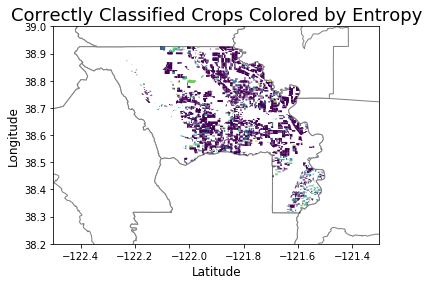

In [29]:
ax = yolo.plot(color = "white", edgecolor = "gray")
class_test.plot(ax =ax, column = 'entropy')
ax.set_xlim([-122.5, -121.3])
ax.set_ylim([38.2, 39])
ax.set_title("Correctly Classified Crops Colored by Entropy", fontsize = 18)
ax.set_xlabel("Latitude", fontsize = 12)
ax.set_ylabel("Longitude", fontsize = 12)

In [30]:
np.mean(misclass_test["entropy"])

0.975001794974005

In [31]:
np.std(misclass_test["entropy"])

0.615332265511965

In [32]:
np.mean(class_test["entropy"])

0.16747459918936033

In [33]:
np.std(class_test["entropy"])

0.37934798791858726